# Project. Analysis of business metrics

## Task
Marketing analysis of Procrastinate Pro+ entertainment app. Despite huge investments in advertising, the company has been making losses for the last few months. It is necessary to understand the reasons and help the company to become profitable.

There is data about users acquired from May 1 to October 27, 2019:
- A server log of their visits,
- their purchases for that period,
- advertising costs.

It is necessary to study:
- where users come from and what devices they use,
- how much it costs to attract users from different advertising channels;
- how much money each customer brings,
- when the cost of attracting a customer pays off,
- which factors prevent effective customer acquisition.


## Data description

There are 3 dataframes available.

File `visits_info_short.csv` stores server log with information about site visits, `orders_info_short.csv` - information about orders, and `costs_info_short.csv` - information about advertising costs.

Structure of visits_info_short.csv:

- User Id - unique identifier of the user,
- Region - user's country,
- Device - user's device type,
- Channel - identifier of the advertising channel,
- Session Start - date and time of session start,
- Session End - date and time of session end.

Structure of orders_info_short.csv:
- User Id - unique identifier of the user,
- Event Dt - date and time of purchase,
- Revenue - order amount.

Structure costs_info_short.csv:
- dt - date of the advertising campaign,
- Channel - advertising channel identifier,
- costs - expenses for this campaign.


### Data loading and preprocessing

Below there are paths for available data.

**File paths**

- visits: `/datasets/visits_info_short.csv`. [Load the data](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- orders: `/datasets/orders_info_short.csv`. [Load the data](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- costs: `/datasets/costs_info_short.csv`. [Load the data](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Data preprocessing include:
- Check if there are missing values and duplicates in the data.
- Check that the data types in all columns correspond to the values stored in them.
- Pay special attention to the date and time columns.


In [1]:
#load libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#load the data

try:
    visits, orders, costs = (
    pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),  # visits
    pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),  # orders
    pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv'),  # costs
    )

except:
    visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # visits
    pd.read_csv('/datasets/orders_info_short.csv'),  # orders
    pd.read_csv('/datasets/costs_info_short.csv'),  # costs
    )

#display info about the data
def print_info_and_sample(df):
    df.info()
    print('*'*50)
    display(df.sample(5, random_state=1))

print_info_and_sample(visits)
print_info_and_sample(orders)
print_info_and_sample(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
**************************************************


,User Id,Region,Device,Channel,Session Start,Session End
211274,738535139711,UK,Android,organic,2019-05-09 15:06:53,2019-05-09 15:48:50
273259,680497695721,Germany,Android,LeapBob,2019-09-02 14:07:28,2019-09-02 14:11:43
205897,728963351414,United States,Mac,organic,2019-10-29 10:45:58,2019-10-29 10:47:25
297860,174899252198,UK,PC,LeapBob,2019-10-11 01:38:37,2019-10-11 01:47:59
169513,513791433815,United States,Android,TipTop,2019-10-02 15:05:58,2019-10-02 15:29:16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
**************************************************


,User Id,Event Dt,Revenue
32012,419263491450,2019-07-30 23:59:07,4.99
38295,483568708610,2019-10-12 16:12:59,4.99
24544,448476047447,2019-10-16 06:11:23,4.99
29442,520659310653,2019-06-15 09:43:35,4.99
6270,680317225380,2019-07-05 13:01:50,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
**************************************************


,dt,Channel,costs
1462,2019-05-23,WahooNetBanner,7.200
510,2019-09-28,RocketSuperAds,11.375
612,2019-07-12,TipTop,288.600
1322,2019-07-02,OppleCreativeMedia,14.750
993,2019-08-02,AdNonSense,26.250


In [3]:
# check the data for exact duplicates
def count_duplicates(df, name):
    duplicates = df.duplicated(keep='first').sum()
    print(f'Number of exact duplicates in {name} before preprocesssing: {duplicates}')

count_duplicates(visits, "visits")
count_duplicates(orders, "orders")
count_duplicates(costs, "costs")

Number of exact duplicates in visits before preprocesssing: 0
Number of exact duplicates in orders before preprocesssing: 0
Number of exact duplicates in costs before preprocesssing: 0


- The data does not have omitted values or exact duplicates
- Data and time columns have incorrect datatype (object), we will correct it before starting analysis
- Additionally, column names will be formatted

In [4]:
#rename the columns
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = costs.columns.str.lower()

# change data and time column format
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#check how changes are carries out
print_info_and_sample(visits)
print_info_and_sample(orders)
print_info_and_sample(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
**************************************************


,user_id,region,device,channel,session_start,session_end
211274,738535139711,UK,Android,organic,2019-05-09 15:06:53,2019-05-09 15:48:50
273259,680497695721,Germany,Android,LeapBob,2019-09-02 14:07:28,2019-09-02 14:11:43
205897,728963351414,United States,Mac,organic,2019-10-29 10:45:58,2019-10-29 10:47:25
297860,174899252198,UK,PC,LeapBob,2019-10-11 01:38:37,2019-10-11 01:47:59
169513,513791433815,United States,Android,TipTop,2019-10-02 15:05:58,2019-10-02 15:29:16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB
**************************************************


,user_id,event_dt,revenue
32012,419263491450,2019-07-30 23:59:07,4.99
38295,483568708610,2019-10-12 16:12:59,4.99
24544,448476047447,2019-10-16 06:11:23,4.99
29442,520659310653,2019-06-15 09:43:35,4.99
6270,680317225380,2019-07-05 13:01:50,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
**************************************************


,dt,channel,costs
1462,2019-05-23,WahooNetBanner,7.200
510,2019-09-28,RocketSuperAds,11.375
612,2019-07-12,TipTop,288.600
1322,2019-07-02,OppleCreativeMedia,14.750
993,2019-08-02,AdNonSense,26.250


- All corrections are carried out correctly. The data has correct column types and names

### Functions to calculate and analyse LTV, ROI, retention and customer conversion.

- `get_profiles()` — function to create customer profile,
- `get_retention()` — function to calculate retention rate,
- `get_conversion()` — function to calculate conversion,
- `get_ltv()` — function for LTV.


#### Customer's profiles function - `get_profiles`

In [5]:
# function for customer profiles

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # find first visit data
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # find date of the first visit for cohort analysis
    # and the first date of a month when the first visit happened
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # add order information
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # add markers for all events from event_names
    #for event in event_names:
       # if event in events['event_name'].unique():
        #    profiles[event] = profiles['user_id'].isin(
        #    )

    # calculate number of unique users with same channel and date of acquisition
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # merge data for advertisment costs and number of users acquired
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # divide costs for advetisment campaign and number of users acquired
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # add customer acquisition costs to user profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # we assume that CAC for organic users is 0.
    #     profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


#### Retention function - `get_retention`

In [6]:
# function for calculating retention

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # add the 'payer' column to the passed list of dimensions
    dimensions = ['payer'] + dimensions

    # exclude users who didn’t “live” until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # gather “raw” data for calculating retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # function for grouping the table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # get the retention dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

     # return both tables and raw data
    return result_raw, result_grouped, result_in_time

#### Function for conversion - `get_conversion`

In [7]:

# # function for calculating conversion

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who didn’t “live” until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

     # determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # add purchase data to user profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort if dimensions list is empty
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # function for grouping the table by selected attributes
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each “cell” in the row by the cohort size
        # to get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # generate the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for conversion dynamics table, remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # generate the conversion dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time

#### Functions to calculate LTV and ROI - `get_ltv`

In [8]:
# function for calculating LTV and ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who didn’t “live” until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # add purchase data to user profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculate user's lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # group by cohort if dimensions list is empty
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # function for grouping by selected attributes
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # calculate cumulative revenue
        result = result.fillna(0).cumsum(axis=1)
        # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # merge cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # calculate LTV: divide each “cell” in a row by the cohort size
        result = result.div(result['cohort_size'], axis=0)
        # exclude lifetimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restore cohort sizes
        result['cohort_size'] = cohort_sizes

        # assemble a DataFrame with user data and CAC values,
        # including attributes from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculate mean CAC by attributes in dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculate ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # remove rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restore cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # add CAC to the ROI table
        roi['cac'] = cac['cac']

        # in the final table, keep cohort sizes, CAC,
        # and ROI values for lifetimes within the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # return LTV and ROI tables
        return result, roi

    # get LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables, remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # get LTV and ROI dynamics tables
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamics table
    )

Below are functions to draw graphs:

- `filter_data()` — for smoothing the data,
- `plot_retention()` — for plotting the Retention Rate chart,
- `plot_conversion()` — for plotting the conversion chart,
- `plot_ltv_roi` — for visualizing LTV and ROI.

#### Smoothing data function - `filter_data`

In [9]:
# function for smoothing a DataFrame

def filter_data(df, window):
    # apply moving average to each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

#### Function for Retention Rate plot - `plot_retention`

In [10]:
# function for retention rate plot

def plot_retention(retention, retention_history, horizon, window=7):

    # set the plot grid size
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes and day 0 retention
    retention = retention.drop(columns=['cohort_size', 0])
    # keep only the desired lifetime in the history table
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if retention table is indexed only by 'payer',
    # add a second attribute — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # the plot grid has two columns and two rows, four cells
    # first cell: retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

    # second cell: retention curves for non-paying users
    # vertical axis shared with the first plot
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of non-paying users')

    # third cell: retention dynamics of paying users
    ax3 = plt.subplot(2, 2, 3)
    # get column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filter data and plot
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition date')
    plt.title(
        'Retention dynamics of paying users on day {}'.format(
            horizon
        )
    )

    # fourth cell: retention dynamics of non-paying users
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filter data and plot
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition date')
    plt.title(
        'Retention dynamics of non-paying users on day {}'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

#### Function for conversion plot `plot_conversion`

In [11]:
# function for conversion plot

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # set the plot grid size
    plt.figure(figsize=(15, 5))

    # exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # keep only the desired lifetime in the history table
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # first plot: conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User conversion')

    # second plot: conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # all index columns except date become pivot table columns
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('User conversion dynamics on day {}'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Function for visualization of LTV and ROI - `plot_ltv_roi`

In [12]:
# function for visualization of LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # set the plot grid size
    plt.figure(figsize=(20, 10))

    # exclude cohort sizes from ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # keep only the desired lifetime in the ltv dynamics table
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # save customer acquisition cost into a separate DataFrame
    cac_history = roi_history[['cac']]

    # remove cohort sizes and CAC from ROI table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in ROI history, keep only the required lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # first plot — LTV curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # second plot — LTV dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # all index columns except 'dt' become columns in the pivot table
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('LTV dynamics on day {}'.format(horizon))

    # third plot — CAC dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition date')
    plt.title('Customer Acquisition Cost dynamics')

    # fourth plot — ROI curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even point')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # fifth plot — ROI dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even point')
    plt.xlabel('Acquisition date')
    plt.title('ROI dynamics on day {}'.format(horizon))

    plt.tight_layout()
    plt.show()

### Exploratory data analysis

- Create user profiles. Determine the minimum and maximum dates for attracting users.

In [13]:
# get user profiles
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

# difine min an max customer acquisition dates
min_analysis_date = profiles['first_ts'].min()
observation_date =  profiles['first_ts'].max()
print('')
print('Minimun date of customer acquisition', min_analysis_date, \
      'Maximum date of customer acquisition', observation_date)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,NaN
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769



Minimun date of customer acquisition 2019-05-01 00:00:41 Maximum date of customer acquisition 2019-10-27 23:59:04


As expected, we have data on users of the Procrastinate Pro+ app acquires from May 1, 2019 to October 27, 2019. Users use the app from different devices, from different regions and are divided into those who paid for a subscription and those who use the free version.

- First, we find out from which countries the app users come and which country has the most paying users. We build a table showing the number of users and paying users rate for each country.

In [14]:
display(
    profiles.groupby('region')
    .agg({'user_id':'nunique', 'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
    .rename(columns={'user_id':'n_users', 'payer':'n_payer'})
    .reset_index()
)

,region,n_users,n_payer
0,United States,100002,0.069019
1,Germany,14981,0.041119
2,UK,17575,0.039829
3,France,17450,0.037994


Users come to the app from the US (100002 users), Germany (14981), UK (17575) and France (17450), with the highest number of unique users coming to the app from the US (100002). The US shows the highest rate of paying users (6.9%).

- Second, find out which devices customers use and which devices are preferred by paying users. We build a table showing the number of users and the paying users rate for each device.

In [15]:
display(
    profiles.groupby('device')
    .agg({'user_id':'nunique', 'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
    .rename(columns={'user_id':'n_users', 'payer':'n_payer'})
    .reset_index()
    .style.format({'n_payer': '{:.2f}'})
)

,device,n_users,n_payer
0,Mac,30042,0.06
1,iPhone,54479,0.06
2,Android,35032,0.06
3,PC,30455,0.05


The app's customers use macbooks (30042 users), iPhones (most users: 54479), android phones (35032) and PCs on other platforms (30455). Paying users prefer macbooks (the paying users rate is 6.3%).

- Third, we study the advertising channels and determine the channels with the highest number of paying users. We create a table showing the number of users and the paying users rate for each channel.

In [16]:
display(
    profiles.groupby('channel')
    .agg({'user_id':'nunique', 'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
    .rename(columns={'user_id':'n_users', 'payer':'n_payer'})
    .reset_index()
    .style.format({'n_payer': '{:.2f}'})
)

,channel,n_users,n_payer
0,FaceBoom,29144,0.12
1,AdNonSense,3880,0.11
2,lambdaMediaAds,2149,0.10
3,TipTop,19561,0.10
4,RocketSuperAds,4448,0.08
5,WahooNetBanner,8553,0.05
6,YRabbit,4312,0.04
7,MediaTornado,4364,0.04
8,LeapBob,8553,0.03
9,OppleCreativeMedia,8605,0.03


In total, we have data on 10 paid channels and organic traffic. The highest number of paying users comes from FaceBoom (12%), AdNonSense (11%), lambdaMediaAds (10%). Other channels show less than 10% of paying users. The largest number of users came to the application independently (organic traffic attracted 56439 users).


### Marketing

- We calculate total costs of marketing campaigns.
- In addition, we find out how costs are divided between channels.

In [17]:
#total costs
print('From 1st of May 2019 to 27th of October 2019 total costs for marketing were:', costs['costs'].sum().round())

From 1st of May 2019 to 27th of October 2019 total costs for marketing were: 105497.0


In [18]:
#how costs are divided between channels
costs_channel = costs.pivot_table(index = 'channel',
        values='costs',
        aggfunc=sum,
    ).sort_values(by='costs', ascending=False)

costs_channel

/tmp/ipython-input-18-364744231.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  costs_channel = costs.pivot_table(index = 'channel',


,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


TipTop (54751.3) and FaceBoom (32445.6) channels spent the most (an order of magnitude more than the other channels)

- Next we build a chart visualizing the weekly spending dynamics over time by each channel. Then, on another chart, we visualize the monthly spending dynamics over time by each source.


/tmp/ipython-input-19-2710485061.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  costs_week = costs.pivot_table(index = ['channel', 'dt_week'],


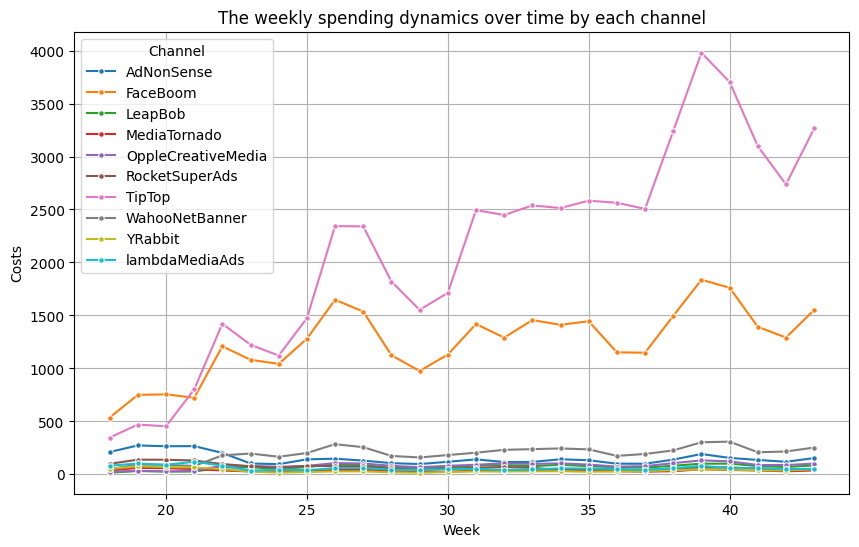

In [19]:
# add a column with week number
costs['dt_week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

costs_week = costs.pivot_table(index = ['channel', 'dt_week'],
        values='costs',
        aggfunc=sum,
    ).reset_index()

# plot a graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=costs_week, x='dt_week', y='costs', hue='channel', marker='o', markersize=4)
plt.title('The weekly spending dynamics over time by each channel')
plt.xlabel('Week')
plt.ylabel('Costs')
plt.grid(True)
plt.legend(title='Channel', loc='upper left')
plt.show()


The weekly spending dynamics over time by each source indicate a noticeable increase in spending on the TipTop and FaceBoom channels, with spendings on these channels significantly higher than all other sources.

/tmp/ipython-input-20-761539260.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  costs_month = costs.pivot_table(index = ['channel', 'dt_month'],


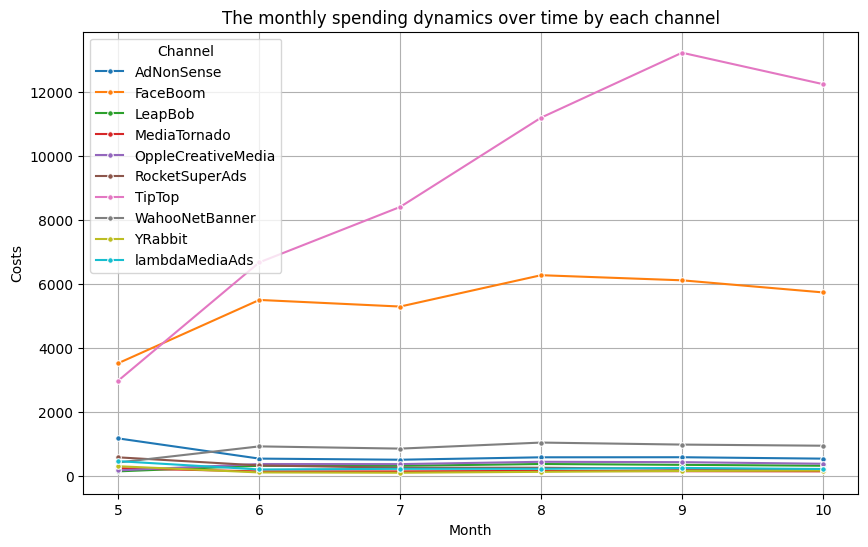

In [20]:
costs['dt_month'] = pd.to_datetime(costs['dt']).dt.month
#costs.head()

costs_month = costs.pivot_table(index = ['channel', 'dt_month'],
        values='costs',
        aggfunc=sum,
    ).reset_index()

# plot a graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=costs_month, x='dt_month', y='costs', hue='channel', marker='o', markersize=4)
plt.title('The monthly spending dynamics over time by each channel')
plt.xlabel('Month')
plt.ylabel('Costs')
plt.grid(True)
plt.legend(title='Channel', loc='upper left')
plt.show()

The monthly spending dynamics over time by each source reveal the same issues with the TipTop and FaceBoom channels as observed in the weekly spending chart: spendings on these channels are significantly higher than all other sources.

- Calculate average CAC for each channel how much on average

In [21]:
#profiles.head()
channel_cac = profiles.pivot_table(index = 'channel',
        values='acquisition_cost',
        aggfunc='mean',
    ).sort_values(by='acquisition_cost', ascending=False).style.format({'acquisition_cost': '{:.2f}'})

channel_cac

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Given the high advertising costs from TipTop and FaceBoom, we examined the customer acquisition cost (CAC) for each source. The highest CAC is observed for the TipTop platform (2.8), followed by FaceBoom (1.1). Next comes AdNonSense (1.0), while the lowest acquisition cost per user is seen for the LeapBob channel (0.2 per user).

### Evaluate Advertising Profitability

Using the LTV, ROI, and CAC charts, we will analyze the return on advertising investments. Let’s assume the current date is November 1, 2019, and according to the business plan, users are expected to break even no later than two weeks after acquisition.

We will assess advertising profitability using the LTV and ROI graphs, as well as the dynamics of LTV, CAC, and ROI over time.


Create a new DataFrame to excule organic users in orger to avoid their influense on advertisment profitability results

In [22]:
profiles_payed = profiles.query('channel != "organic"')

In [23]:
observation_date = datetime(2019, 11, 1).date()  # date of analysis or observation date
horizon_days = 14  # analysis horizon

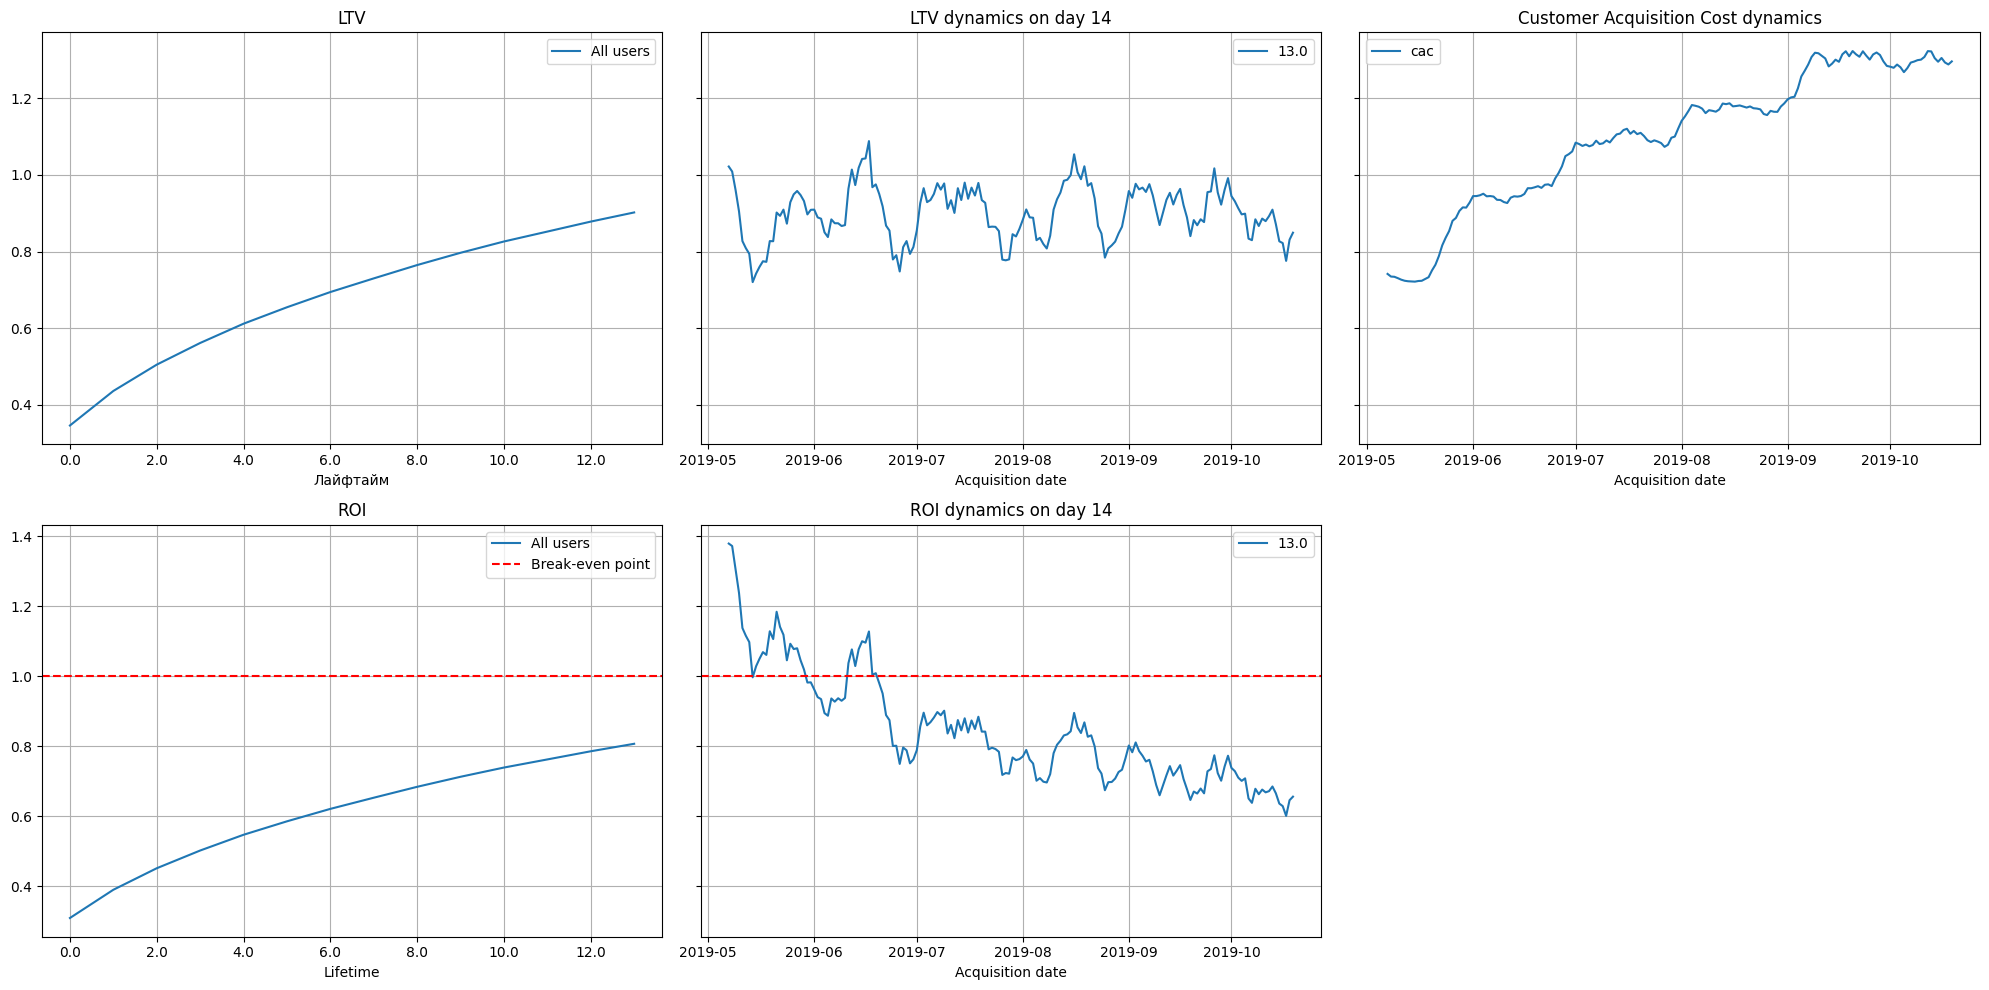

In [24]:
#First, we assess the overall situation by looking at the LTV and ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payed, orders, observation_date, horizon_days
)

# plot graphs
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

From the graphs, we can draw the following conclusions:

- Advertising is not paying off.
- Starting from July 2019, ROI has dropped to 80–90%, whereas initially it ranged from 140% to 100%.
- CAC is unstable and continues to grow, possibly due to an increase in the advertising budget.
- LTV remains relatively stable, which suggests that the issue is not with the quality of acquired users.

- On next step, we examine customer conversion and its dynamic and plot respective graphs. Same we do for retention.

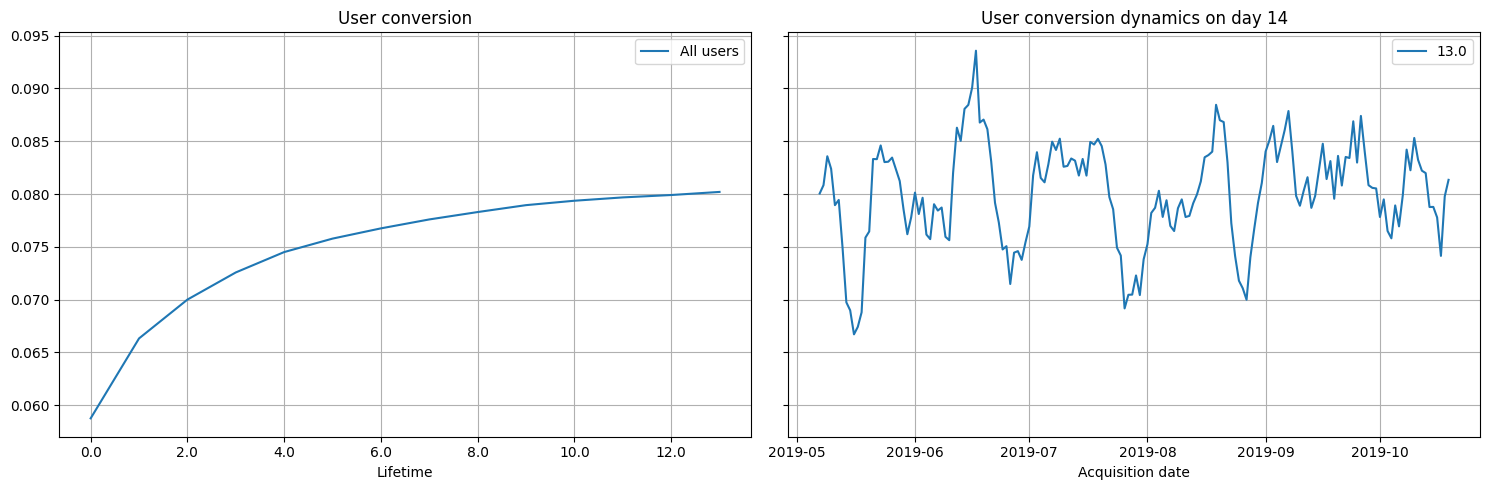

In [25]:
# customer conversion

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_payed, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Based on the graphs, users are converting well and consistently. Let's take a closer look at the conversion rates, broken down by device, channel, and country. After that, we'll examine user retention — both overall and in detail.

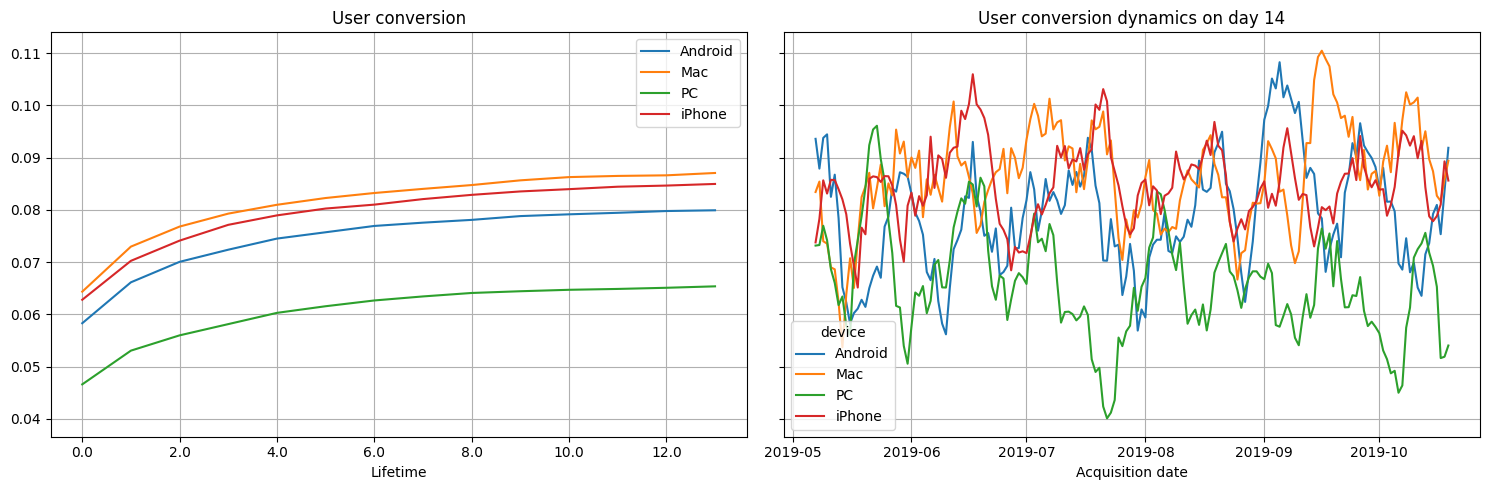

In [26]:
# conversion by devices

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_payed, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Based on the graphs for conversion by devices, the best conversion into paying users is observed for Mac and iPhone users, the worst is for PC and android users. Conversion dynamics on day 14 is stable for all devices.

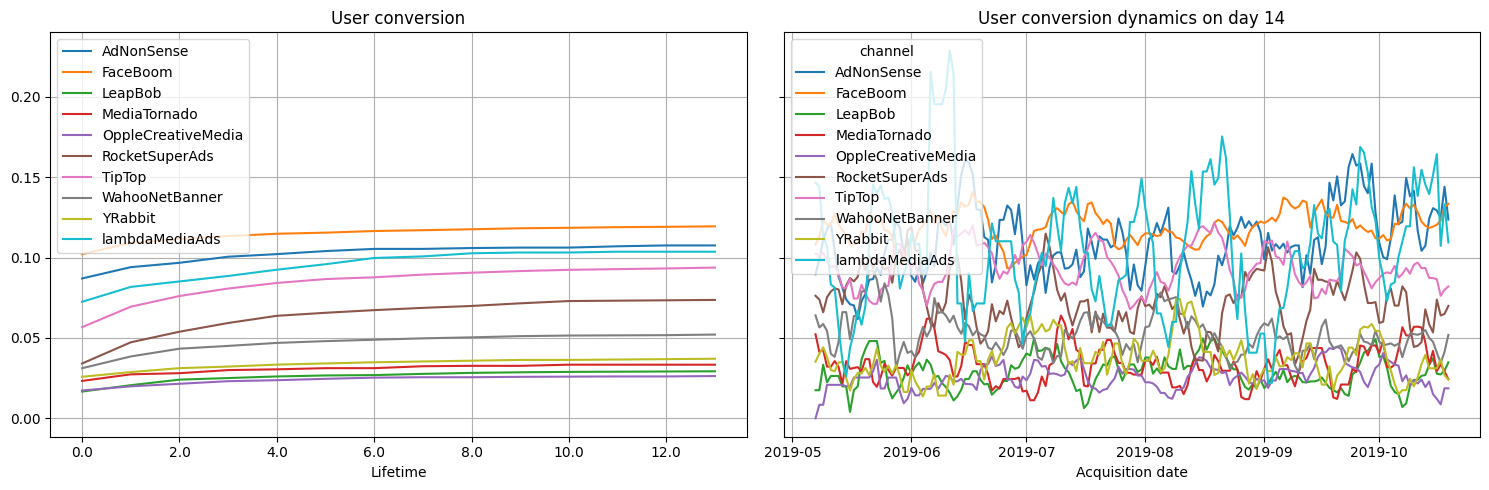

In [27]:
# conversion by chnnels

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_payed, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

The best conversion is seen for users who came from FaceBoom (0,12 at day 12), AdNonSense and lambdaMediaAds. The worst conversion shows users from - OppleCreativeMedia (0,03 at day 12), LeapBob, and MediaTornado. At the same time conversion dynamics is stable for all channels(there is short-term increase seen in June for lambdaMediaAds channel).

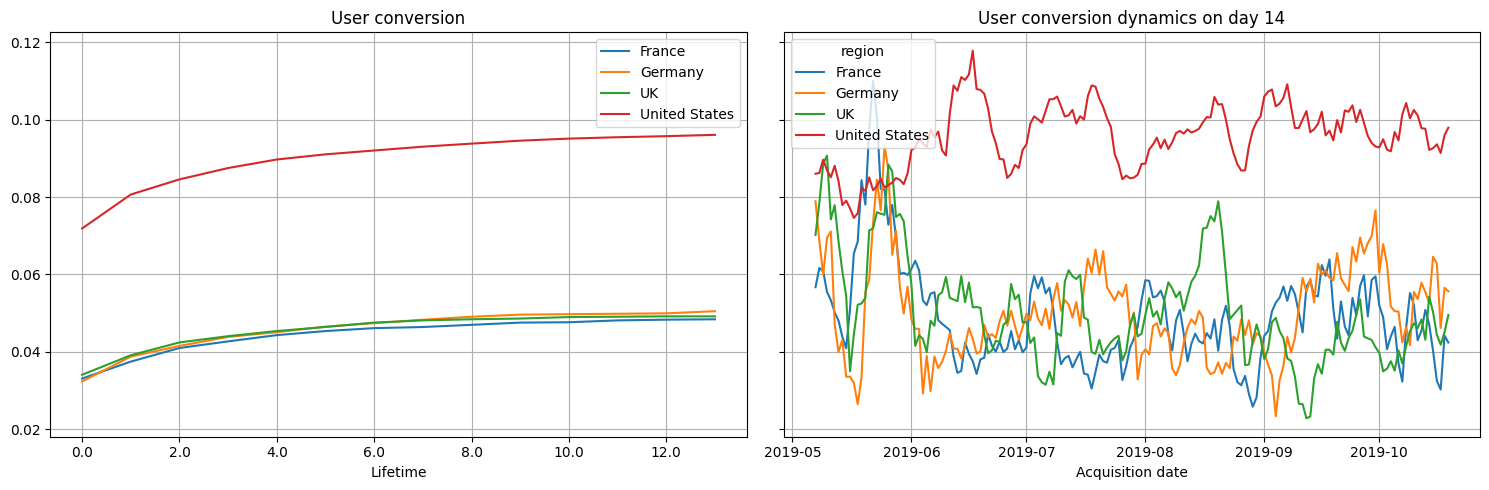

In [28]:
# conversion by regions

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_payed, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

The conversion breakdown by country shows that the USA stands out positively compared to other regions — the conversion rate on day 12 is 0.09, whereas for the other three regions it does not exceed 0.05 by the same point. This trend is also reflected in the conversion dynamics chart, where the USA consistently demonstrates a higher conversion rate than the other countries.

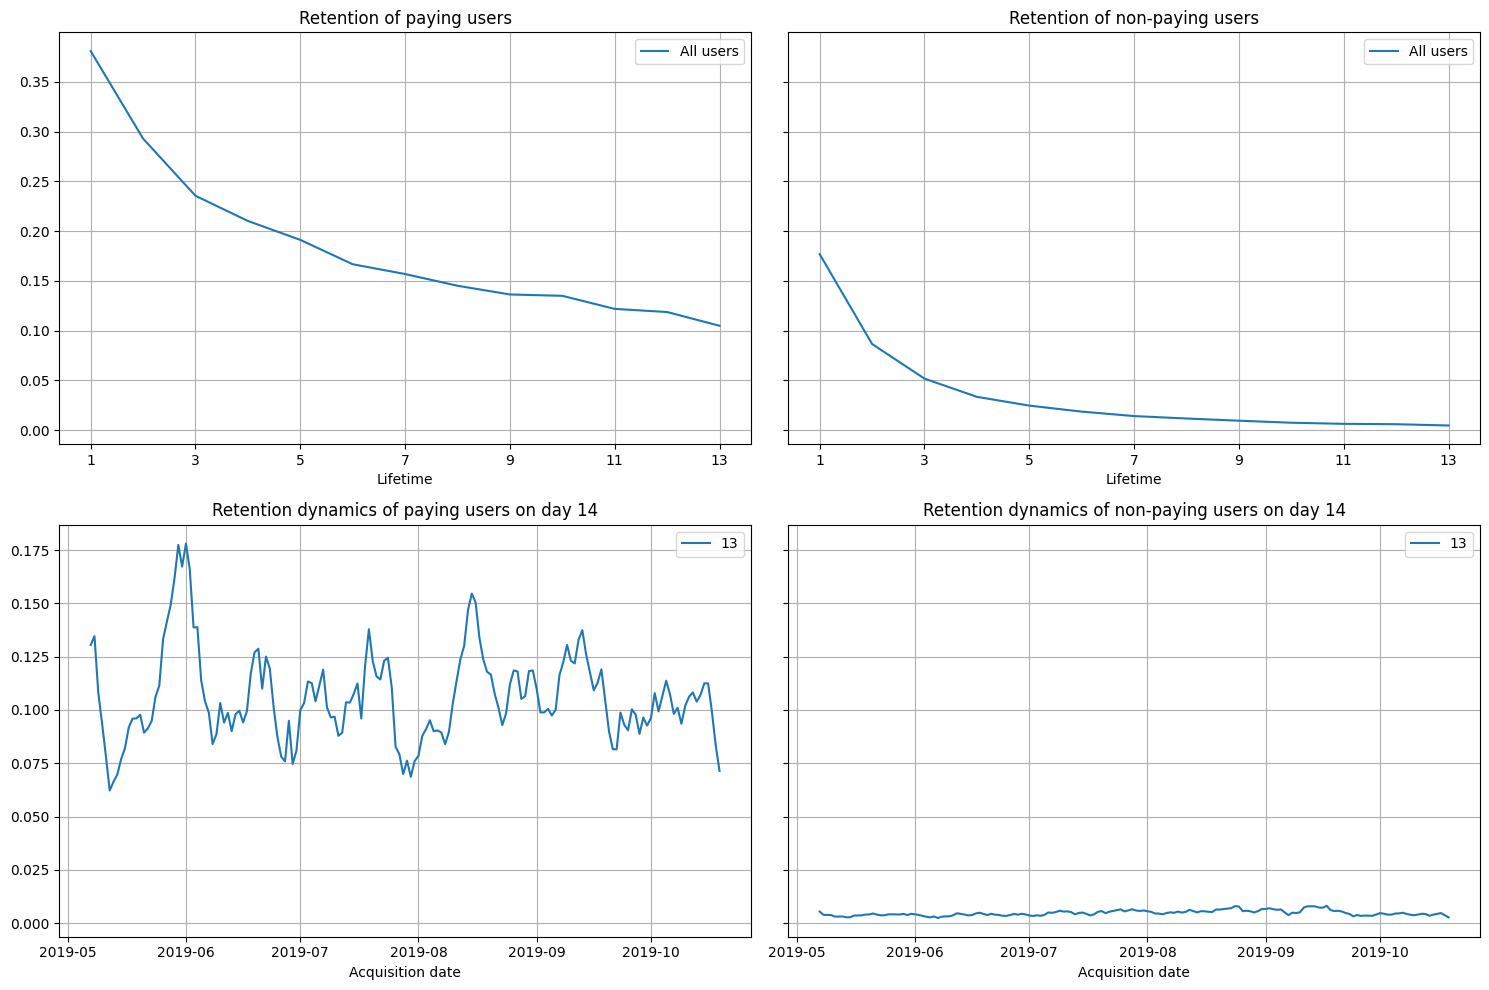

In [29]:
# overall retention

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_payed, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

Paying users have good retention and it is higher than retention for non-paying users. Retention rate for paying users is quite stable and no anomalous values can be seen.

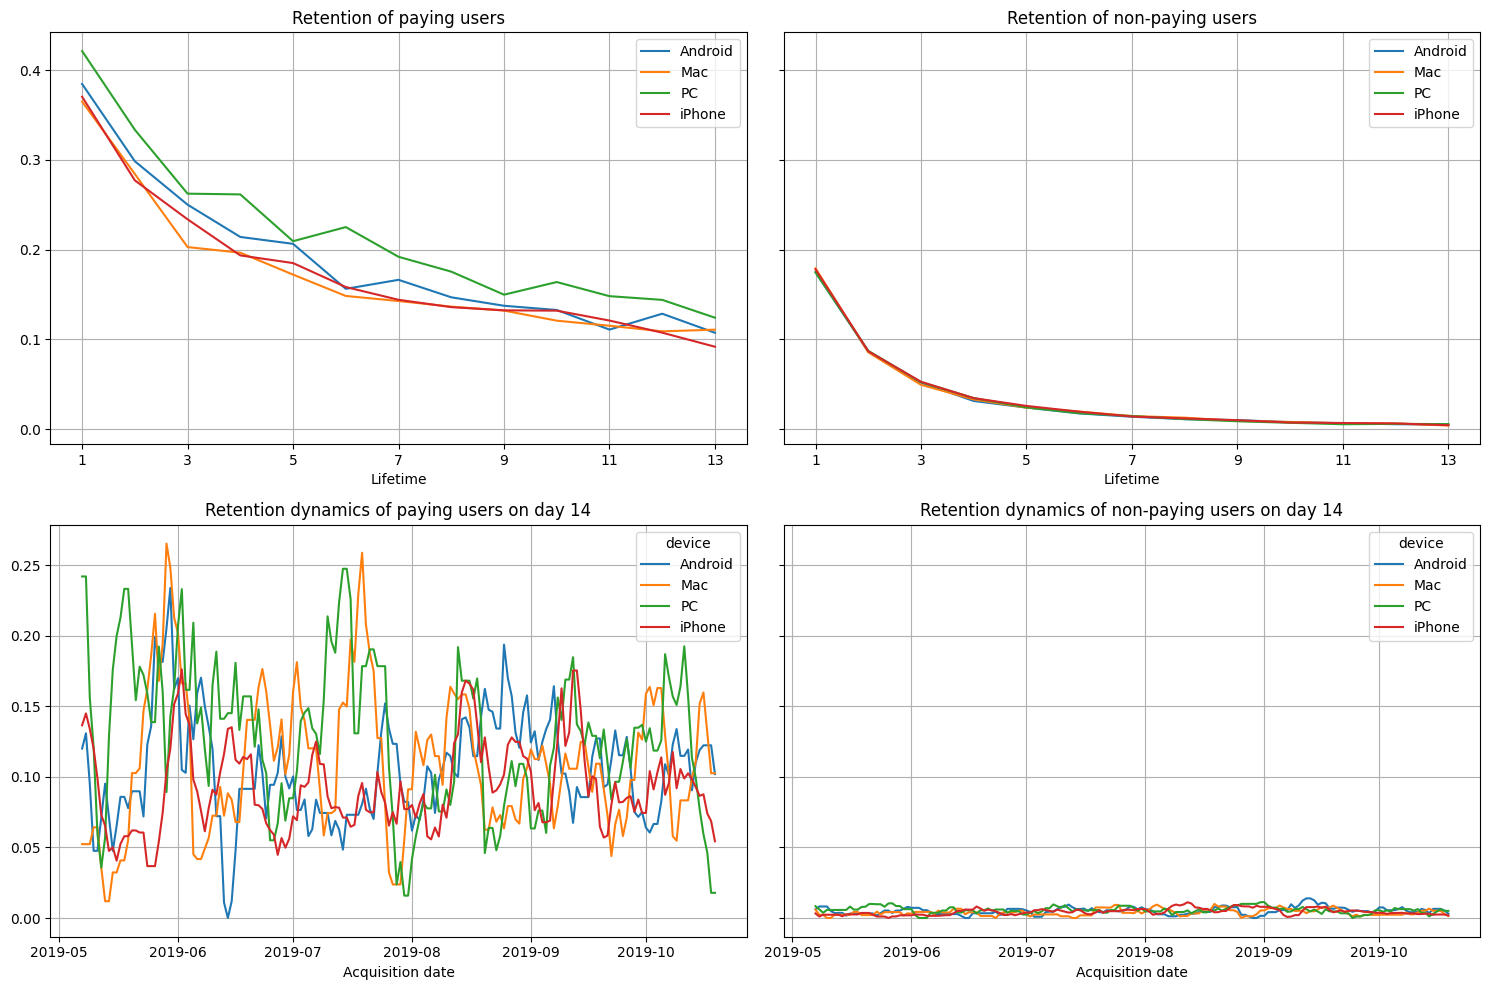

In [30]:
# retention by devices

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_payed, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Retention for paying users shows decreasing trend by day 12 (from 0,4 to 0,1). Retention for PC and android users is slightly higher compared to Mac and iPhone. Paying users retention dynamics is stable and varies from 0,02 to 0,25.

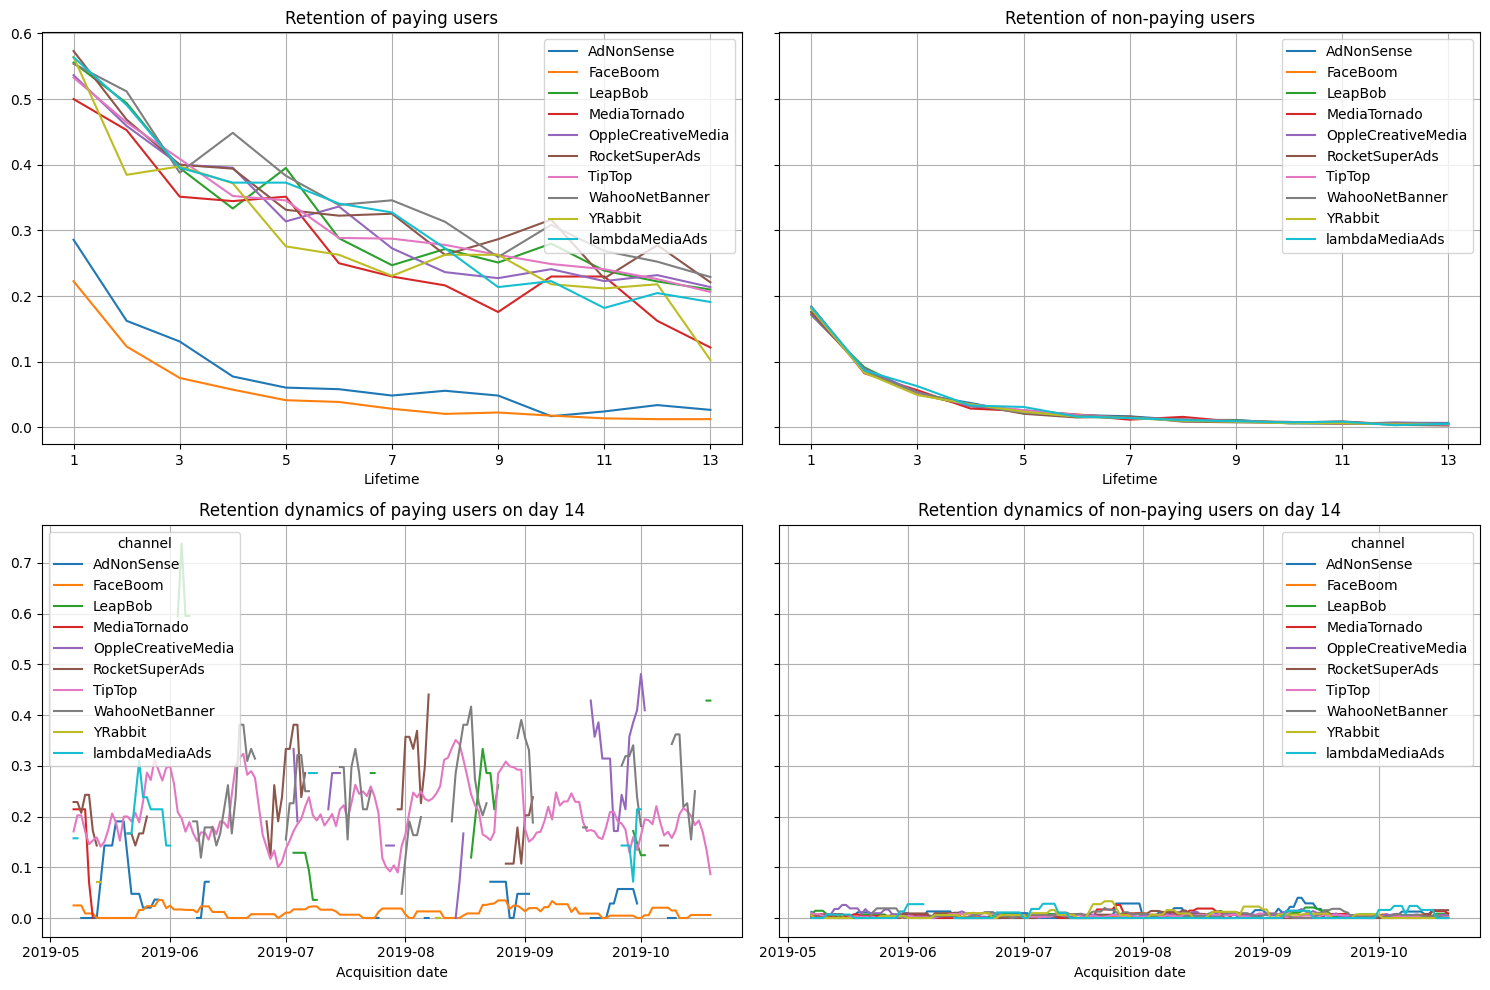

In [32]:
# retention by channels

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_payed, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

In [33]:
#number of rows used for plotting
# lambdaMediaAds
print(retention_history.query('channel == "lambdaMediaAds" & payer == True').shape[0])
#FaceBoom
print(retention_history.query('channel == "FaceBoom" & payer == True').shape[0])

121
172


Retention of paying users for FaceBoom and AdNonSense is lower than for other channels, dropping from 0.3 to nearly 0. Additionally, the retention trend on day 14 abruptly cuts off. Upon reviewing the data passed to the plotting function, it was observed that many channels lack data for certain time periods. For instance, the dataframe for FaceBoom's paying users contains approximately 170 rows, while lambdaMediaAds (which also has a discontinuous graph) has only about 120 rows — meaning data is missing for around 50 days.

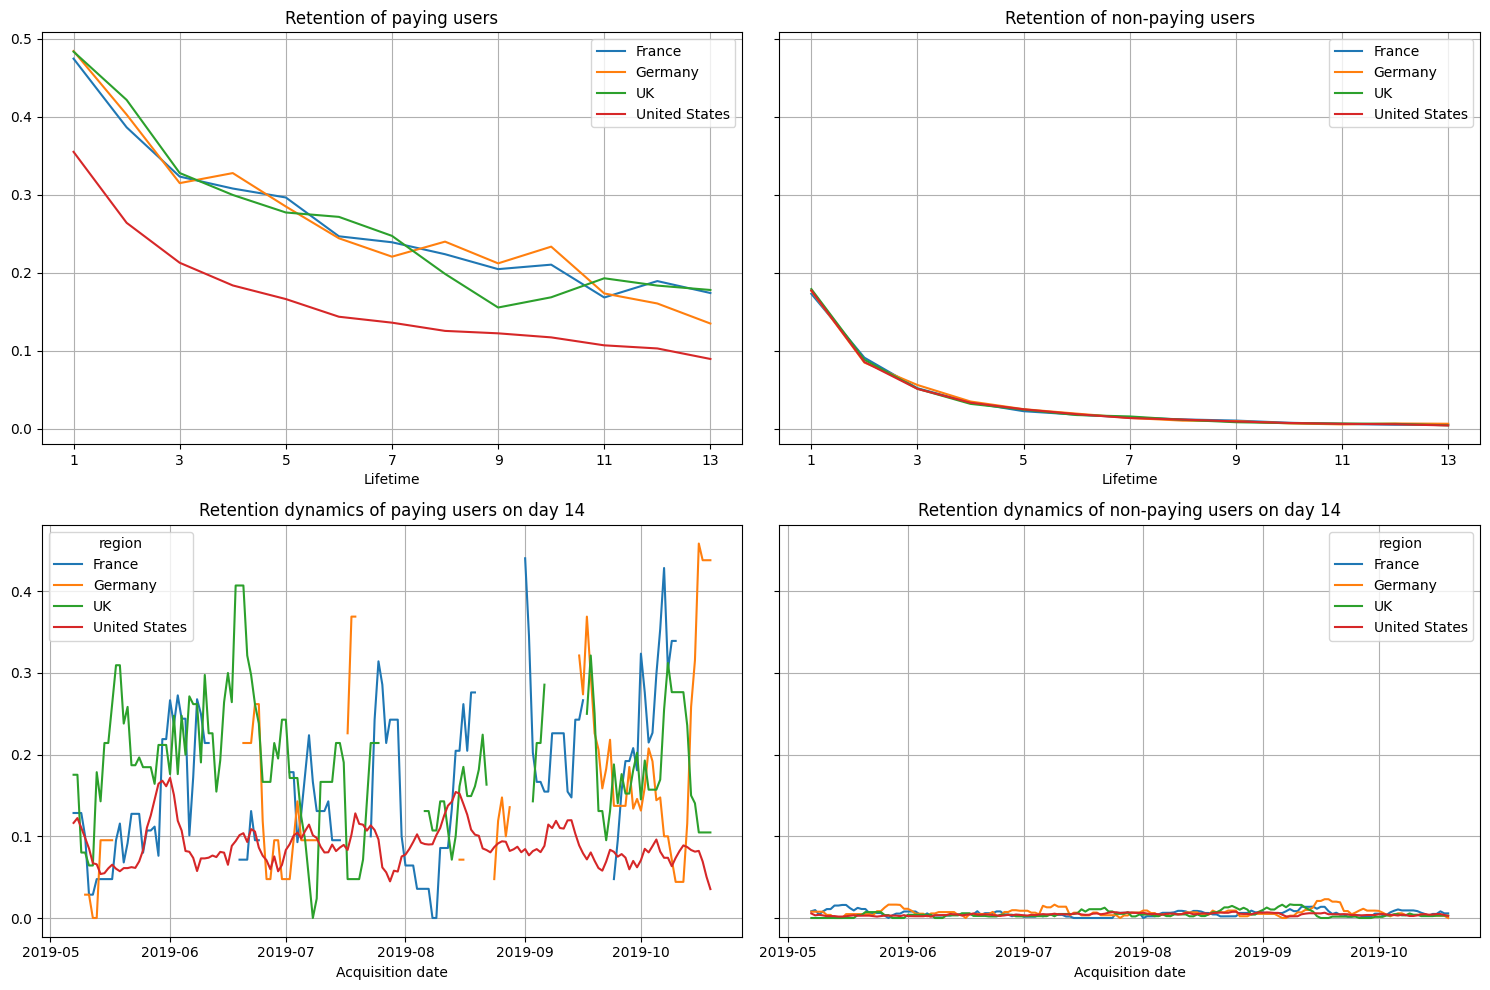

In [34]:
# retention by region

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_payed, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Paying users from the United States show the lowest retention. Data for Germany, the United Kingdom, and France is incomplete — the graphs are discontinuous. As a result, the metrics for these regions may not accurately reflect the actual situation, especially if some data was lost during export or collection.

- Next, we analyse advertisment campaigns profitability by devices. We plot graphs for LTV and ROI, along with dynamics for LTV, CAC, and ROI.

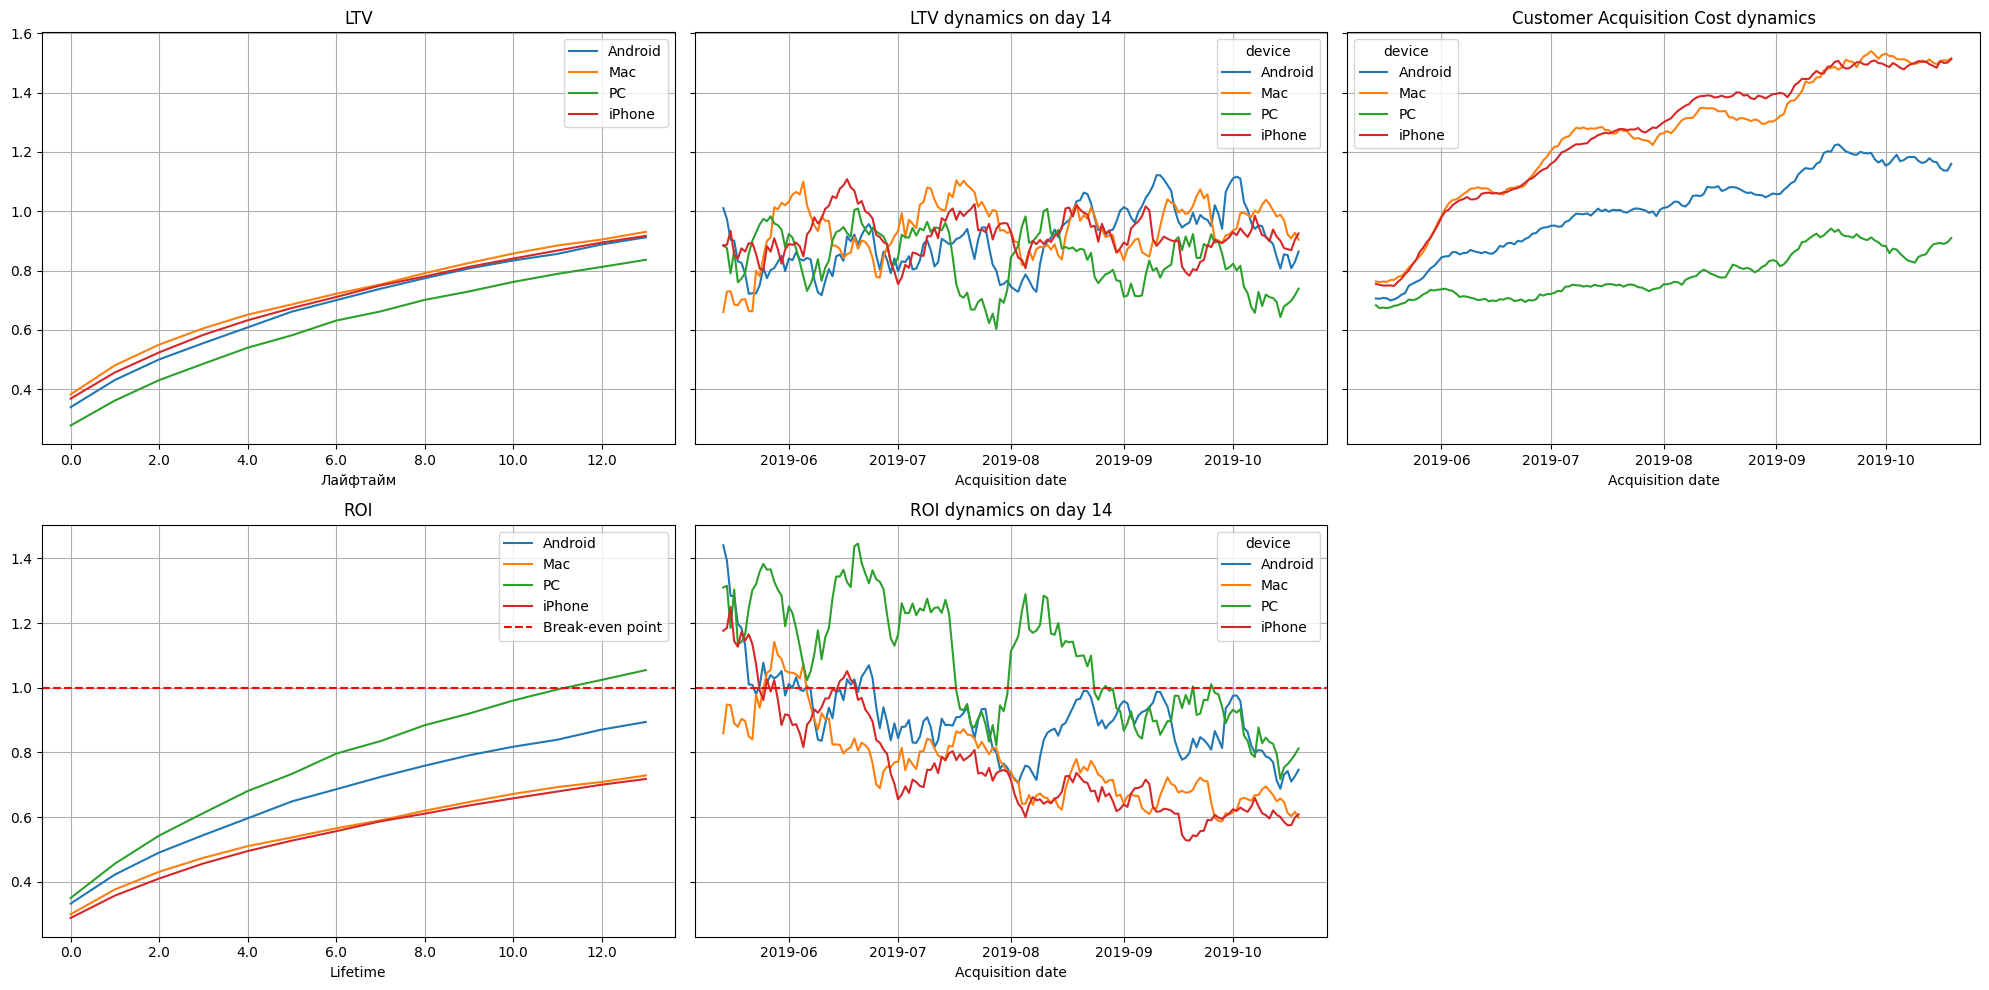

In [35]:
# ltv, cac, and roi by devices

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payed, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

* All trends appear roughly the same across all device types.
* However, PC users reached the break-even point by day 12, while users on other devices did not.
* The cost of user acquisition is higher for Mac and iPhone, and there is a general upward trend in acquisition costs across all devices.
* At the same time, ROI is declining for all devices, with a sharper drop observed for iPhone and Mac compared to Android and PC.

Mac and iPhone may be having a slightly negative impact on overall advertising profitability.


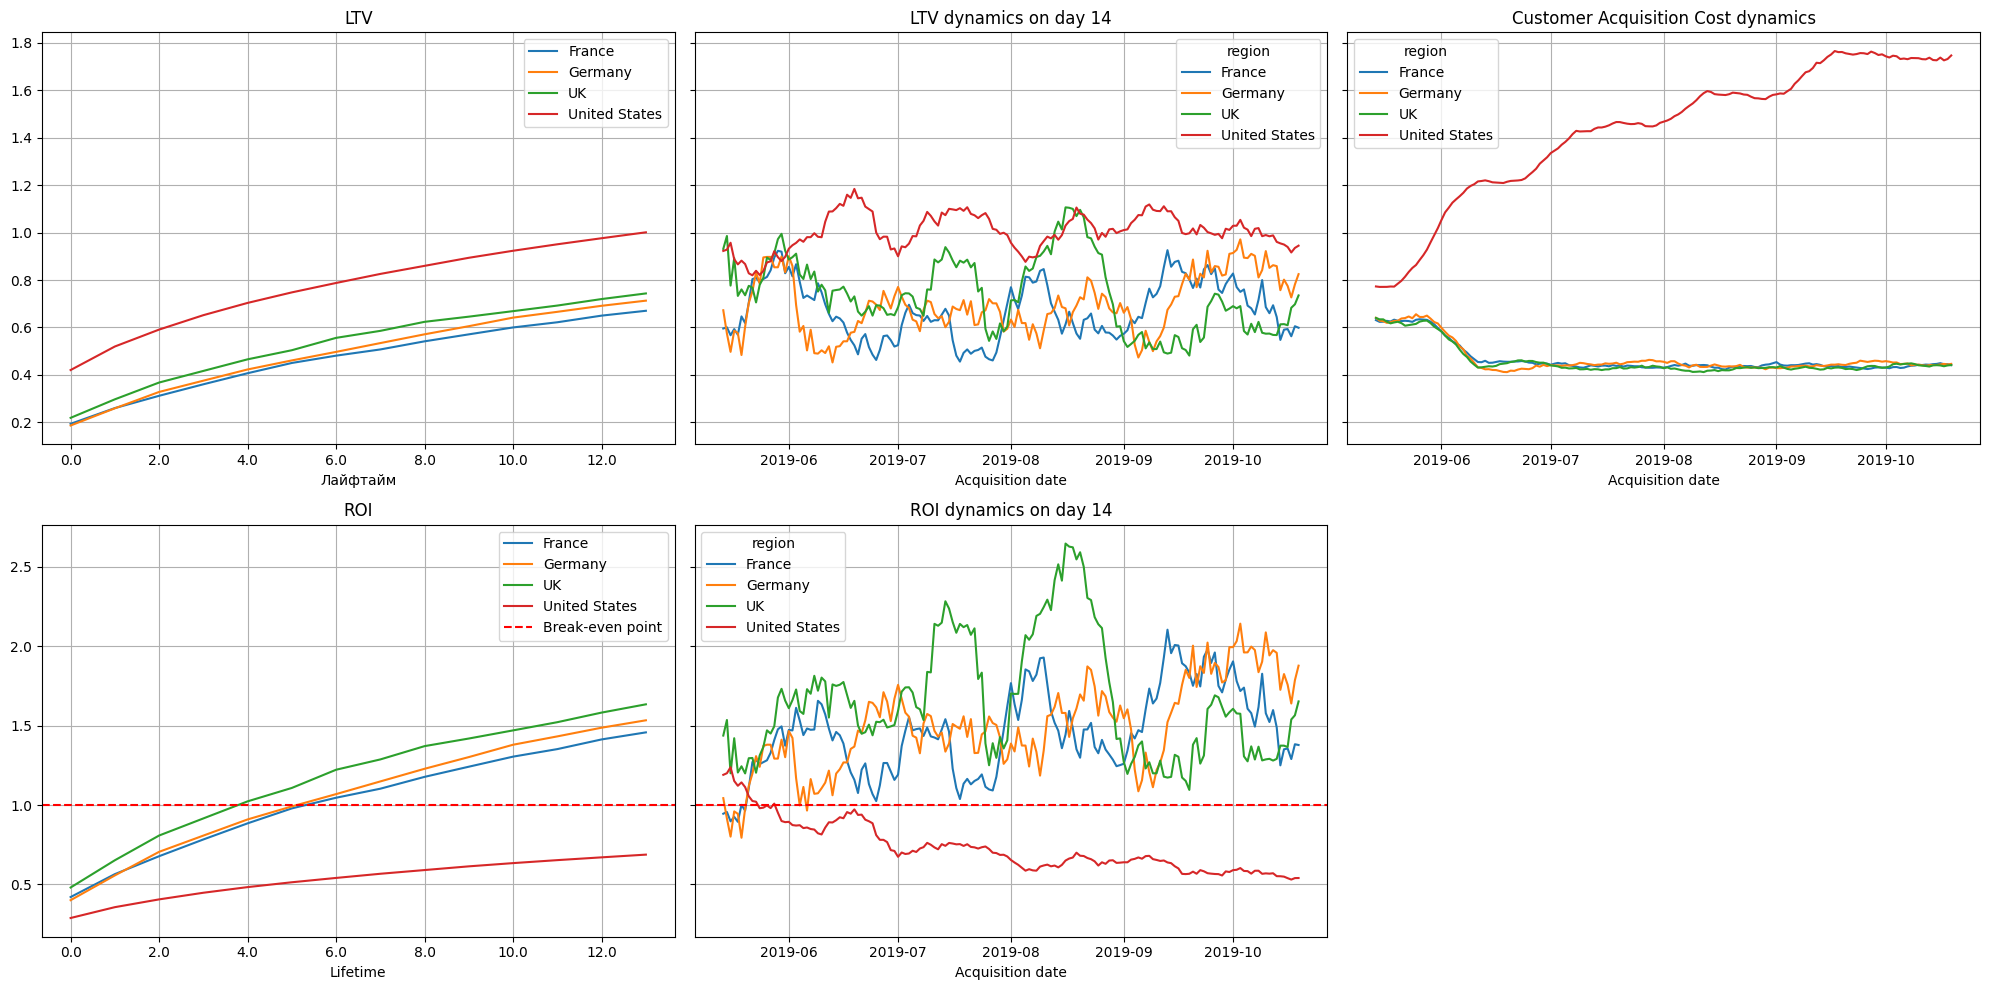

In [36]:
# ltv, cac, and roi by region

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payed, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Breaking down the metrics by country reveals clear "underperformers." For example:

* LTV is highest in the U.S., but the customer acquisition cost (CAC) for this region is also significantly higher than in others—and continues to rise.
* As a result, advertising in the U.S. is not profitable, whereas Germany, France, and the U.K. reached break-even as early as days 4–5.
* The ROI trend in the U.S. is negative, while for the other three regions it's stable and ranges between 150–250%.

This suggests that the overall lack of profitability in advertising may be primarily driven by the situation in the U.S.


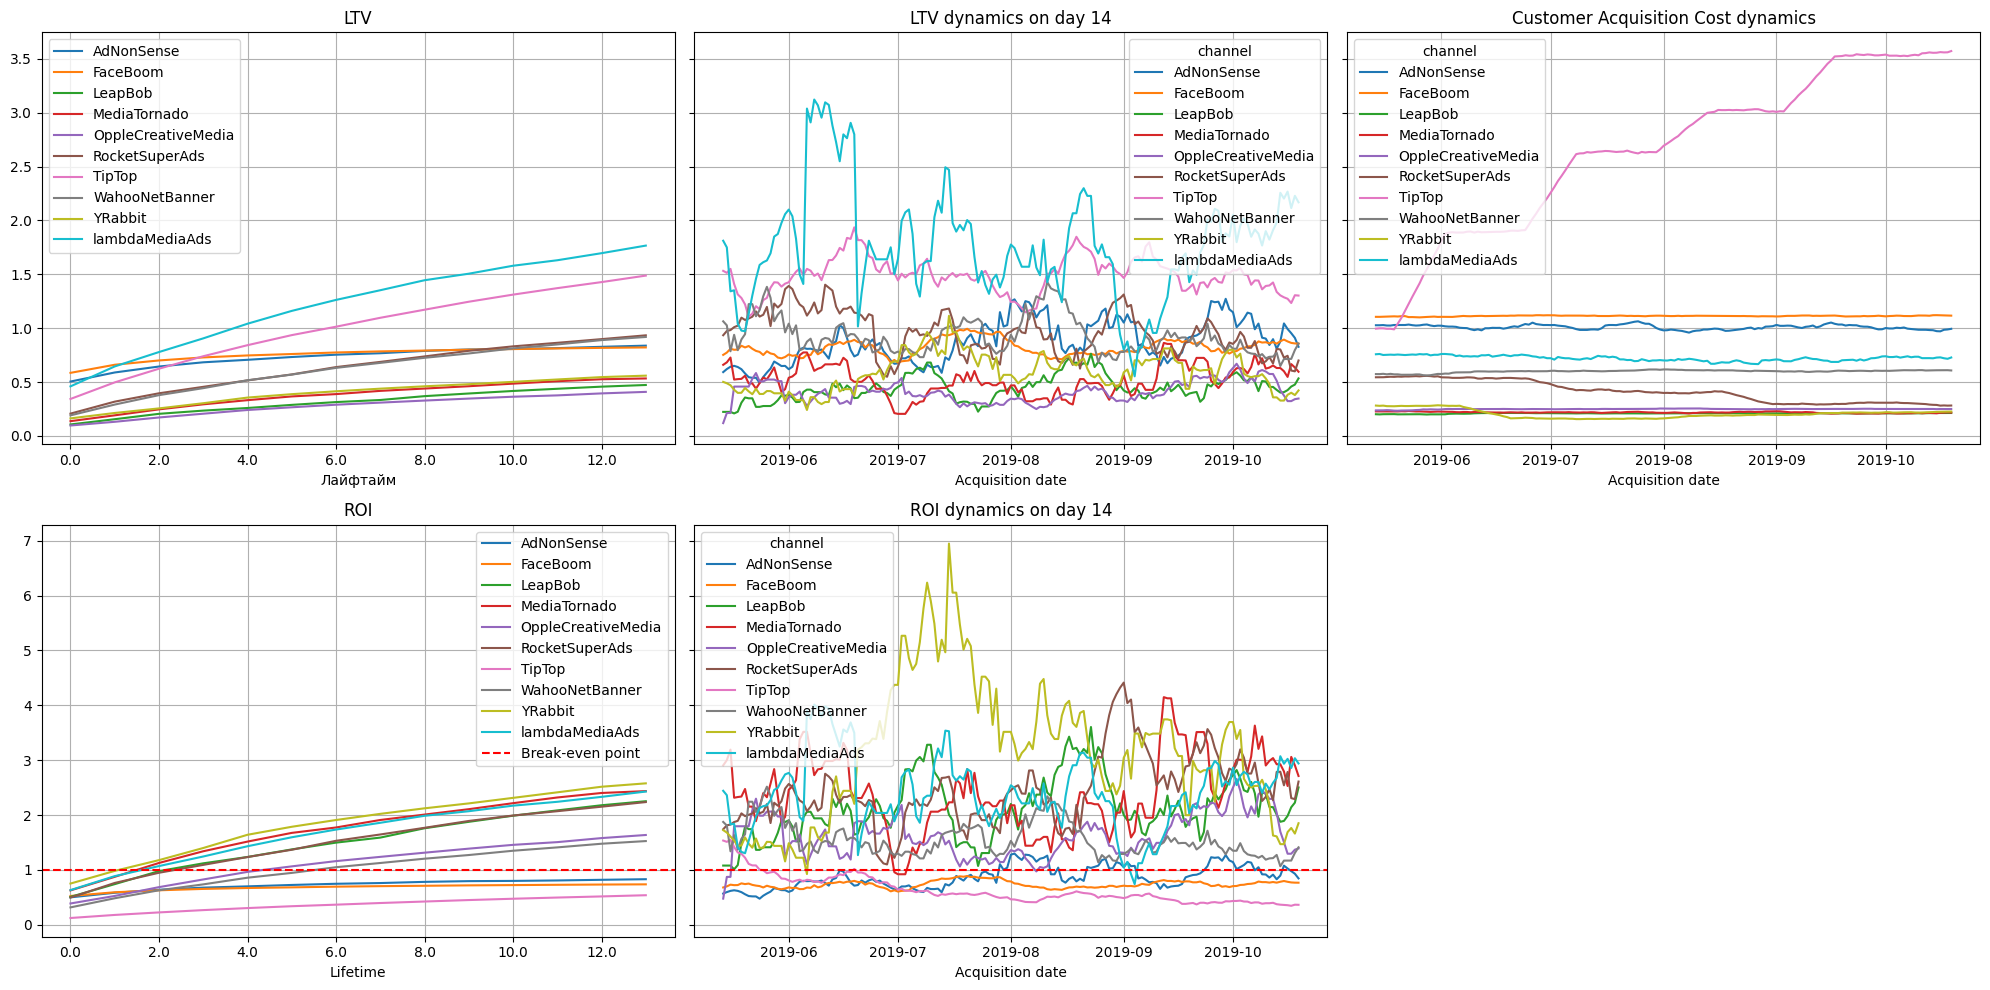

In [37]:
# ltv, cac, and roi by channels

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payed, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Overall, LTV is growing steadily, and for the lambdaMediaAds and TipTop channels, it is higher than for other channels.

* The CAC trend is stable for all channels except TipTop.
* For TipTop, CAC increases in steps month over month, and as previously noted, this channel has the highest acquisition cost.

It is clear that advertising on TipTop, FaceBoom, and AdNonSense is not profitable.


In [38]:
#Let's find out what channels work for the US

display(
    profiles[profiles['region'] == 'United States'].groupby('channel')
    .agg({'user_id':'nunique', 'acquisition_cost': 'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'user_id':'n_users'})
    .reset_index()
    .style.format({'acquisition_cost': '{:.2f}'})
)
#Let's see which regions the AdNonSense channel operates in,
# since its advertising is also unprofitable, but it doesn't run in the U.S., which we analyzed earlier.
display(
    profiles[profiles['channel'] == 'AdNonSense'].groupby('region')
    .agg({'user_id':'nunique', 'acquisition_cost': 'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'user_id':'n_users'})
    .reset_index()
    .style.format({'acquisition_cost': '{:.2f}'})
)

,channel,n_users,acquisition_cost
0,TipTop,19561,2.80
1,FaceBoom,29144,1.11
2,RocketSuperAds,4448,0.41
3,YRabbit,4312,0.22
4,MediaTornado,4364,0.22
5,organic,38173,nan


,region,n_users,acquisition_cost
0,Germany,1219,1.01
1,UK,1295,1.01
2,France,1366,1.01


In [39]:
#Number of users acquired and average CAC by channels and regions
#we pay special attention to number of users acquired
display(
    profiles.pivot_table(
    index=['channel', 'region'],
    values=['user_id', 'acquisition_cost'],
    aggfunc={'user_id':'nunique', 'acquisition_cost': 'mean'}
    ).sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'user_id':'n_users'})
    #.reset_index()
    .style.format({'acquisition_cost': '{:.2f}'})
)

Summary:
- Advertising aimed at user acquisition is not profitable.
- For some channels, there are data gaps of up to 50 days, which may lead to underreporting of user counts and their corresponding metrics. It is necessary to verify how the data was exported for all channels in the regions of Germany, France, and the United Kingdom, and recalculate the metrics if additional data becomes available.
- Based on the available data, the unprofitability of advertising may be negatively affected by regions (such as the U.S.), channels (TipTop, FaceBoom, and AdNonSense), as well as by devices running macOS and iPhones, which may also contribute to the trend.
- The profitability issues may be caused by high advertising costs in certain channels. It is recommended to carefully analyze the cost structure for AdNonSense, TipTop, and FaceBoom, and determine, for example, which payment model is used for these channels. Notably, the two most expensive user acquisition channels — TipTop and FaceBoom — are operating in the U.S., so the negative trend in that region may be specifically driven by these channels.



### Conclusion

1. This study analyzes data on users of the entertainment app Procrastinate Pro+ who were acquired between May 1, 2019, and October 27, 2019. Users access the app from various devices, from different regions, and are divided into those who have paid for a subscription and those who use the free version.

2. Users come to the app from the USA (100,002 users), Germany (14,981), the UK (17,575), and France (17,450), with the highest number of unique users coming from the USA (100,002), where the highest percentage of paying users (6.9%) is also observed. **The USA is an important region for business development**.

3. App users are using MacBooks (30,042 users), iPhones (most users: 54,479), Android phones (35,032), and PCs on other platforms (30,455). Paying users prefer MacBooks (the share of paying users is 6.3%).

4. We have data on a total of 10 paid acquisition sources and organic traffic. The largest ratio of paying users comes from FaceBoom (12%), AdNonSense (11%), and lambdaMediaAds (10%). Other sources show less than 10% of paying users. The largest number of users, however, came to the app independently (organic traffic attracted 56,439 users).

5. The most advertising funds were spent on the channels TipTop (54,751.3) and FaceBoom (32,445.6), which is an order of magnitude more than on other channels.

6. The weekly spending dynamics over time for each source indicate a noticeable increase in spending on the channels TipTop and FaceBoom, with expenses for these channels being significantly higher than all other sources. The monthly spending dynamics over time for each source indicate the same issues with TipTop and FaceBoom channels as the weekly spending dynamics graph: expenses on these channels are significantly higher than all other sources.

7. Given the high advertising expenses on TipTop and FaceBoom, we examined the cost of acquiring users from each channel. The highest acquisition cost is observed for the TipTop (2.8) and FaceBoom (1.1) platforms. This is followed by the AdNonSense platform (1.0), with the lowest cost of acquiring one user being on the LeapBob channel (0.2 per user).

8. From the analysis, it follows that **the advertising is not paying off**. Since July 2019, the ROI has been 80-90%, although initially, the ROI was between 140% and 100%. CAC is unstable and constantly increasing, possibly due to rising advertising costs. LTV is fairly stable, indicating that the issue is not with the deterioration of user quality.

9. Users convert well and consistently. Paying users are retained quite well and significantly better than non-paying users (**paying users are beneficial for this business**). Moreover, retention for paying users is fairly stable. We also studied changes in conversion and retention broken down by devices, regions, and advertising channels:

- Based on the breakdown by devices, Mac and iPhone users convert the best, while PC and Android users convert the worst. The conversion dynamics on the 14th day are stable across all devices.
- Users who came from FaceBoom (0.12 on the 12th day of their life), AdNonSense, and lambdaMediaAds convert the best to paying users, while OppleCreativeMedia (0.03 on the 12th day of their life), LeapBob, and MediaTornado convert the worst. However, the conversion dynamics for all channels are stable, with a short-term increase noticed in June for the lambdaMediaAds channel.
- The conversion breakdown by countries indicates that the USA stands out positively compared to other regions (conversion on the 12th day is 0.09), while for the other three regions it did not exceed 0.05 on the 12th day of life. This is also reflected in the conversion dynamics chart, where the USA consistently shows higher conversion than other regions.
- Retention of paying users steadily decreases by the 12th day for all devices from 0.4 to 0.1. For PC and Android, retention is slightly higher than for Mac and iPhone. The dynamics of paying users' retention are stable, ranging from 0.02 to 0.25.
- Retention of paying users for FaceBoom and AdNonSense is lower than for other channels, dropping from 0.3 to almost 0. Retention dynamics of paying users on the 14th day are interrupted. When examining the data passed to the chart-building function, it was noted that **many channels lack data for certain periods. For example, the dataframe for FaceBoom paying users has about 170 rows, while lambdaMediaAds (interrupted graph) only has 120 rows (missing around 50 days)**.
- Paying users from the USA are retained the worst. Data for Germany, the UK, and France is incomplete, and the graphs are interrupted. Metrics for these regions may not reflect the actual situation if, for example, some data was lost during export.

10. According to the analysis of advertising profitability broken down by devices, PCs achieved breakeven by the 12th day, while other devices did not reach the breakeven level. The cost of user acquisition is higher for Mac and iPhone, but there is a trend of increasing acquisition cost for all devices. Meanwhile, profitability is declining for all devices, but more so for iPhones and Macs than for Androids and PCs. **Mac and iPhone are more frequently used by users who convert well into paying customers and are important for this business**.

11. The analysis of metrics by countries indicates clear "outsiders." LTV is higher for the USA; however, the cost of customer acquisition for this region is significantly higher than all others and continues to rise. Advertising for the USA is not profitable, whereas Germany, France, and the UK reached breakeven by the 4th-5th day. The profitability trend for the USA is also negative, whereas for the other three regions, it is stable and ranges between 150% and 250%. **Company losses may be a consequence of advertising policies in the USA region.**

12. When analyzed by advertising channels, LTV shows fairly stable growth, being higher for lambdaMediaAds and TipTop channels compared to others. The trend in user acquisition cost is stable for all channels except TipTop. CAC for TipTop increases stepwise each month (previously identified as having the highest CAC for this channel). **Advertising from TipTop, FaceBoom, and AdNonSense is definitively not profitable.**


To sum up, among the reasons for the inefficiency in user acquisition, the following should be highlighted:

- For some advertising channels, there are data gaps of up to 50 days, which may lead to an underestimation of the number of users and incorrect metric calculations. It is necessary to check how data export occurred for all channels in the Germany, France, and UK regions and recalculate the metrics if additional data becomes available.

- The existing data indicates the use of expensive user acquisition channels. It is necessary to examine the operating policies of the TipTop, FaceBoom, and AdNonSense channels and determine, for example, what payment model is configured for these channels. It might be worth considering a change.

- In addition to the second point, other user acquisition channels for the USA should be explored. TipTop and FaceBoom together attracted only 10,000 more users than organic users who independently accessed the app. Other channels in this region attract around 5,000 users, which is very low. Meanwhile, **the USA is a very important region for the app, as it demonstrates the highest number of paying users alongside the number of attracted users.**
